In [1]:
import pandas as pd
from core import read_log_file
import os
import numpy as np


log_file = '29bd972a-b1bb-4c18-b932-e6cae1081872.ulg'
parameters = ['vehicle_global_position_0']
df = read_log_file(log_file, parameters)

# Show available variables
df.columns

Index(['timestamp_sample', 'lat', 'lon', 'alt', 'alt_ellipsoid', 'delta_alt',
       'eph', 'epv', 'terrain_alt', 'lat_lon_reset_counter',
       'alt_reset_counter', 'terrain_alt_valid', 'dead_reckoning'],
      dtype='object')

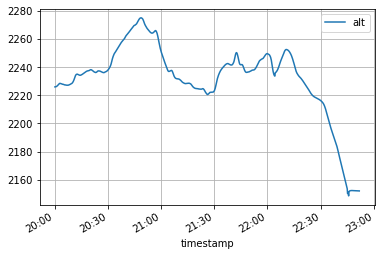

In [2]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter


# To change the time window one can change the line below. For example "between_time('0:20', '0:24')"
ax = df.between_time('0:20', '0:24').plot(y = ['alt'])

# Remove date/day from x axis
mm_ss = DateFormatter('%M:%S')
ax.xaxis.set_major_formatter(mm_ss)

ax.grid()

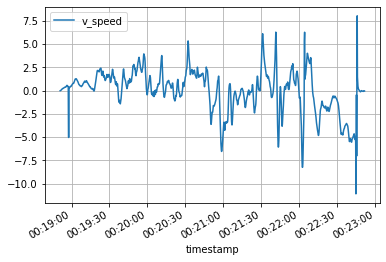

In [3]:
time = (df.index-min(df.index)).total_seconds().to_numpy()
df['v_speed'] = np.gradient(df.alt.to_numpy(), time)

ax = df.between_time('0:00', '0:59').plot(y = ['v_speed'])
ax.grid()